# importing libraries

In [1]:
import pandas as pd
import numpy as np
import re
import string

##methods and stopwords text processing

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#machine learning libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings 
warnings.filterwarnings("ignore")

In [2]:
tweets_df = pd.read_csv('Tweet_NFT.xlsx - Sheet1.csv') 

In [3]:
tweets_df.head(-5)

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127443,1278714,@m4rabbit_nft @M4_MILRAB @ATSNFT ðŸš¨Join Some...,2022-08-08T03:32:04.000Z,NaN
127444,1278716,"@CryptoEmdarks Ape into @FlokiMooni ,ready to ...",2022-08-08T03:32:04.000Z,NaN
127445,1278717,@OliverV08601162 @Cyberfleet_NFT @elonmusk Why...,2022-08-08T03:32:03.000Z,NaN
127446,1278718,@AbdurRa33870413 @BarkRik56 @JE_GES @airmmn43 ...,2022-08-08T03:32:02.000Z,NaN


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                127453 non-null  int64 
 1   tweet_text        127453 non-null  object
 2   tweet_created_at  127453 non-null  object
 3   tweet_intent      96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


In [5]:
tweets_df['tweet_intent'].unique()

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon', nan],
      dtype=object)

In [6]:
tweets_df.shape

(127453, 4)

## labelising tweet intent column

In [7]:

l=[]
for i in tweets_df['tweet_intent']:
    if i=='Whitelist':
        l.append(9)
    elif i=='Appreciation':
        l.append(1)
    elif i=='Community':
        l.append(2)
    elif i=='Done':
        l.append(3)
    elif i=='Giveaway':
        l.append(4)
    elif i=='Interested':
        l.append(5)
    elif i=='Launching Soon':
        l.append(6)
    elif i=='pinksale':
        l.append(7)
    elif i=='Presale':
        l.append(8)
    else:
        l.append(0)
        
tweets_df['tweet_intent']=l

In [8]:
tweets_df.head(-5)

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,2
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,4
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,1
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,2
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,2
...,...,...,...,...
127443,1278714,@m4rabbit_nft @M4_MILRAB @ATSNFT ðŸš¨Join Some...,2022-08-08T03:32:04.000Z,0
127444,1278716,"@CryptoEmdarks Ape into @FlokiMooni ,ready to ...",2022-08-08T03:32:04.000Z,0
127445,1278717,@OliverV08601162 @Cyberfleet_NFT @elonmusk Why...,2022-08-08T03:32:03.000Z,0
127446,1278718,@AbdurRa33870413 @BarkRik56 @JE_GES @airmmn43 ...,2022-08-08T03:32:02.000Z,0


In [9]:
tweets_df.isna().sum()

id                  0
tweet_text          0
tweet_created_at    0
tweet_intent        0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'tweet_intent'}>]], dtype=object)

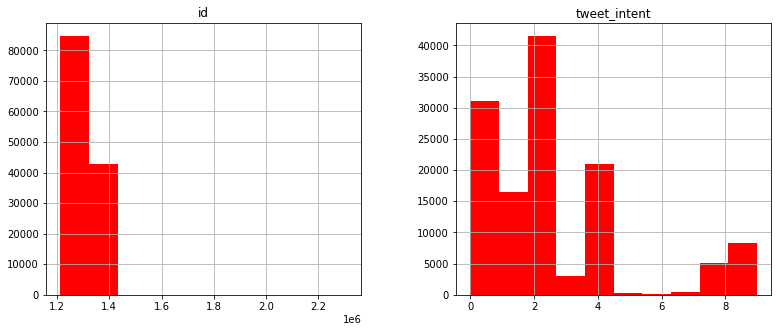

In [10]:
#explore dataset
tweets_df.hist(figsize=(13,5), color = 'r')

## ENGLISH STOPWORDS

### CREATING A STOPWORD TEXT

In [11]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AFFAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AFFAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### preprocessing the text tweet

In [13]:
def preprocess_tweet_text(tweet):
    #convert the text to lowercase
    tweet = tweet.lower()
    
    #remove any urls
    tweet = re.sub(r"http\S+|www\S+|https\S+","",tweet, flags=re.MULTILINE)
    
    #remove punctutaion
    tweet = tweet.translate(str.maketrans("","", string.punctuation))
    
    #remove user @ references and '#' from tweet 
    tweet = re.sub(r'\@\w+|\#',"",tweet)
    
    #remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    
    #stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)
    

## splitting data with intent or data with missing intent

In [14]:
tweets_df1, tweets_df2 = [x for _, x in tweets_df.groupby(tweets_df['tweet_intent'] ==0)]

In [15]:
tweets_df1

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,2
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,4
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,1
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,2
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,2
...,...,...,...,...
96359,1424490,@nft_cryptogang @liuyan93721534 0x9fE808D8a9E2...,2022-08-11T23:11:58.000Z,1
96360,1424491,Just registered to win @cryptopunksnfts #1859 ...,2022-08-11T23:11:58.000Z,8
96361,1424494,"@SolSniffer Dyor on the nft collection ""Dictat...",2022-08-11T23:11:58.000Z,1
96362,1424497,#NFT #NFTCommmunity #DeltaFlare\nJoin me on Di...,2022-08-11T23:11:56.000Z,2


In [16]:
tweets_df2

,id,tweet_text,tweet_created_at,tweet_intent
96364,1212764,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:35.000Z,0
96365,1212770,@asksabir007 @dao_lm Don't miss the chance to ...,2022-08-06T16:56:33.000Z,0
96366,1212773,This zesty faucet from @_bitcoiner is making m...,2022-08-06T16:56:33.000Z,0
96367,1212804,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:23.000Z,0
96368,1212776,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",2022-08-06T16:56:32.000Z,0
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,0
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,0
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,0
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,0


In [17]:
tweets_df1['tweet_text'] = tweets_df1['tweet_text'].apply(preprocess_tweet_text)
tweets_df2['tweet_text'] = tweets_df2['tweet_text'].apply(preprocess_tweet_text)

In [18]:
print(tweets_df1)

            id                                         tweet_text  \
0      1212762  cryptobrodi ecology1990 moonrunnersnft itsukin...   
1      1212763  need sick charact artâ “ art artist artist an...   
2      1212765  thehulknft inagotchinft tesla killabearsnft el...   
3      1212766  cryptobatznft darekbtw first project crypto mo...   
4      1212767  sashadysonn first project crypto move earn ast...   
...        ...                                                ...   
96359  1424490  nftcryptogang liuyan93721534 0x9fe808d8a9e2e34...   
96360  1424491  regist win cryptopunksnft 1859 blokpax let go ...   
96361  1424494  solsniff dyor nft collect dictat theyr builder...   
96362  1424497  nft nftcommmun deltaflar join discord join tel...   
96363  1424498  duckbath diozoth elonmusk richerd johnnft2 nft...   

               tweet_created_at  tweet_intent  
0      2022-08-06T16:56:36.000Z             2  
1      2022-08-06T16:56:36.000Z             4  
2      2022-08-06T16:56:35.

## VECTORIZING TOKENS

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=preprocess_tweet_text)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df1['tweet_text']).toarray()
tweets_countvectorizer2 = vectorizer.fit_transform(tweets_df2['tweet_text']).toarray()

In [20]:
tweets_countvectorizer.shape

(96364, 118)

In [21]:
tweets_countvectorizer2.shape

(31089, 119)

In [22]:
X = tweets_countvectorizer

In [23]:
y = tweets_df1['tweet_intent']

### train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(96364, 118) (77091, 118) (19273, 118)


## model trainning

In [26]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
#predicting the test results
y_predict_test = NB_classifier.predict(X_test)

In [29]:
print(y_predict_test)

[2 2 2 ... 4 1 1]


In [30]:
#r squared value
r2_test = metrics.r2_score(y_test, y_predict_test)

<IPython.core.display.Javascript object>

In [31]:
r2_test

0.09012474627211464

<IPython.core.display.Javascript object>

<AxesSubplot:>

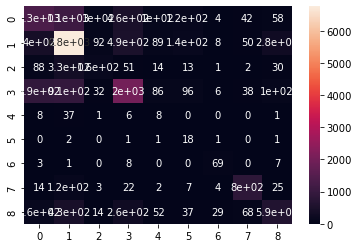

In [32]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           1       0.46      0.40      0.43      3319
           2       0.70      0.81      0.75      8298
           3       0.39      0.23      0.29       684
           4       0.60      0.48      0.53      4152
           5       0.02      0.13      0.04        61
           6       0.04      0.75      0.08        24
           7       0.57      0.78      0.66        88
           8       0.80      0.80      0.80      1002
           9       0.54      0.36      0.43      1645

    accuracy                           0.61     19273
   macro avg       0.46      0.53      0.45     19273
weighted avg       0.61      0.61      0.60     19273



### predicting data with missing intents

In [34]:
Y = tweets_countvectorizer2[:,:118]

In [35]:
y_predict_test2 = NB_classifier.predict(Y)

In [36]:
print(y_predict_test2)

[4 2 1 ... 1 1 2]


In [37]:
y_predict_test2.shape

(31089,)

In [38]:
results = pd.DataFrame()
results['id'] = tweets_df2['id']
results['tweet_intent'] = y_predict_test2

In [39]:
results.head(5)

,id,tweet_intent
96364,1212764,4
96365,1212770,2
96366,1212773,1
96367,1212804,4
96368,1212776,1


In [41]:
results.to_csv('final_results.csv', index=False)